In [1]:
from pathlib import Path

IMAGES_PATH = Path() / "images" 
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import pandas as pd
import seaborn as sns

nutrition_filepath = Path() / "Datathon Data/Nutrition_Physical_Activity_and_Obesity_Data.csv"
stock_price_filepath = Path() / "Datathon Data/all_stock_and_etfs.csv"
nutrition_data = pd.read_csv(nutrition_filepath)
stock_price_data = pd.read_csv(stock_price_filepath, index_col="Date-Time", parse_dates=True)

C:\Users\wengl\AppData\Local\Temp\ipykernel_28584\1151479309.py:6: DtypeWarning: Columns (18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  nutrition_data = pd.read_csv(nutrition_filepath)


In [3]:
nutrition_data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2019,2019,AK,Alaska,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who achieve...,NaN,Value,...,"(64.845079957001, -147.722059036)",PA,PA1,Q048,VALUE,2,Race/Ethnicity,Asian,RACE,RACEASN
1,2019,2019,AZ,Arizona,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,...,"(34.86597028, -111.763811277)",OWS,OWS1,Q038,VALUE,4,Total,Total,OVR,OVERALL
2,2019,2019,DC,District of Columbia,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have ob...,NaN,Value,...,"(38.890371385, -77.031961127)",OWS,OWS1,Q038,VALUE,11,Total,Total,OVR,OVERALL
3,2019,2019,IL,Illinois,Youth Risk Behavior Surveillance System,Physical Activity,Physical Activity - Behavior,Percent of students in grades 9-12 who partici...,NaN,Value,...,"(40.485010283, -88.997710178)",PA,PA1,Q049,VALUE,17,Grade,10th,GRADE,GRADE10
4,2019,2019,MD,Maryland,Youth Risk Behavior Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of students in grades 9-12 who have an...,NaN,Value,...,"(39.290580964, -76.609260111)",OWS,OWS1,Q039,VALUE,24,Race/Ethnicity,2 or more races,RACE,RACE2PLUS


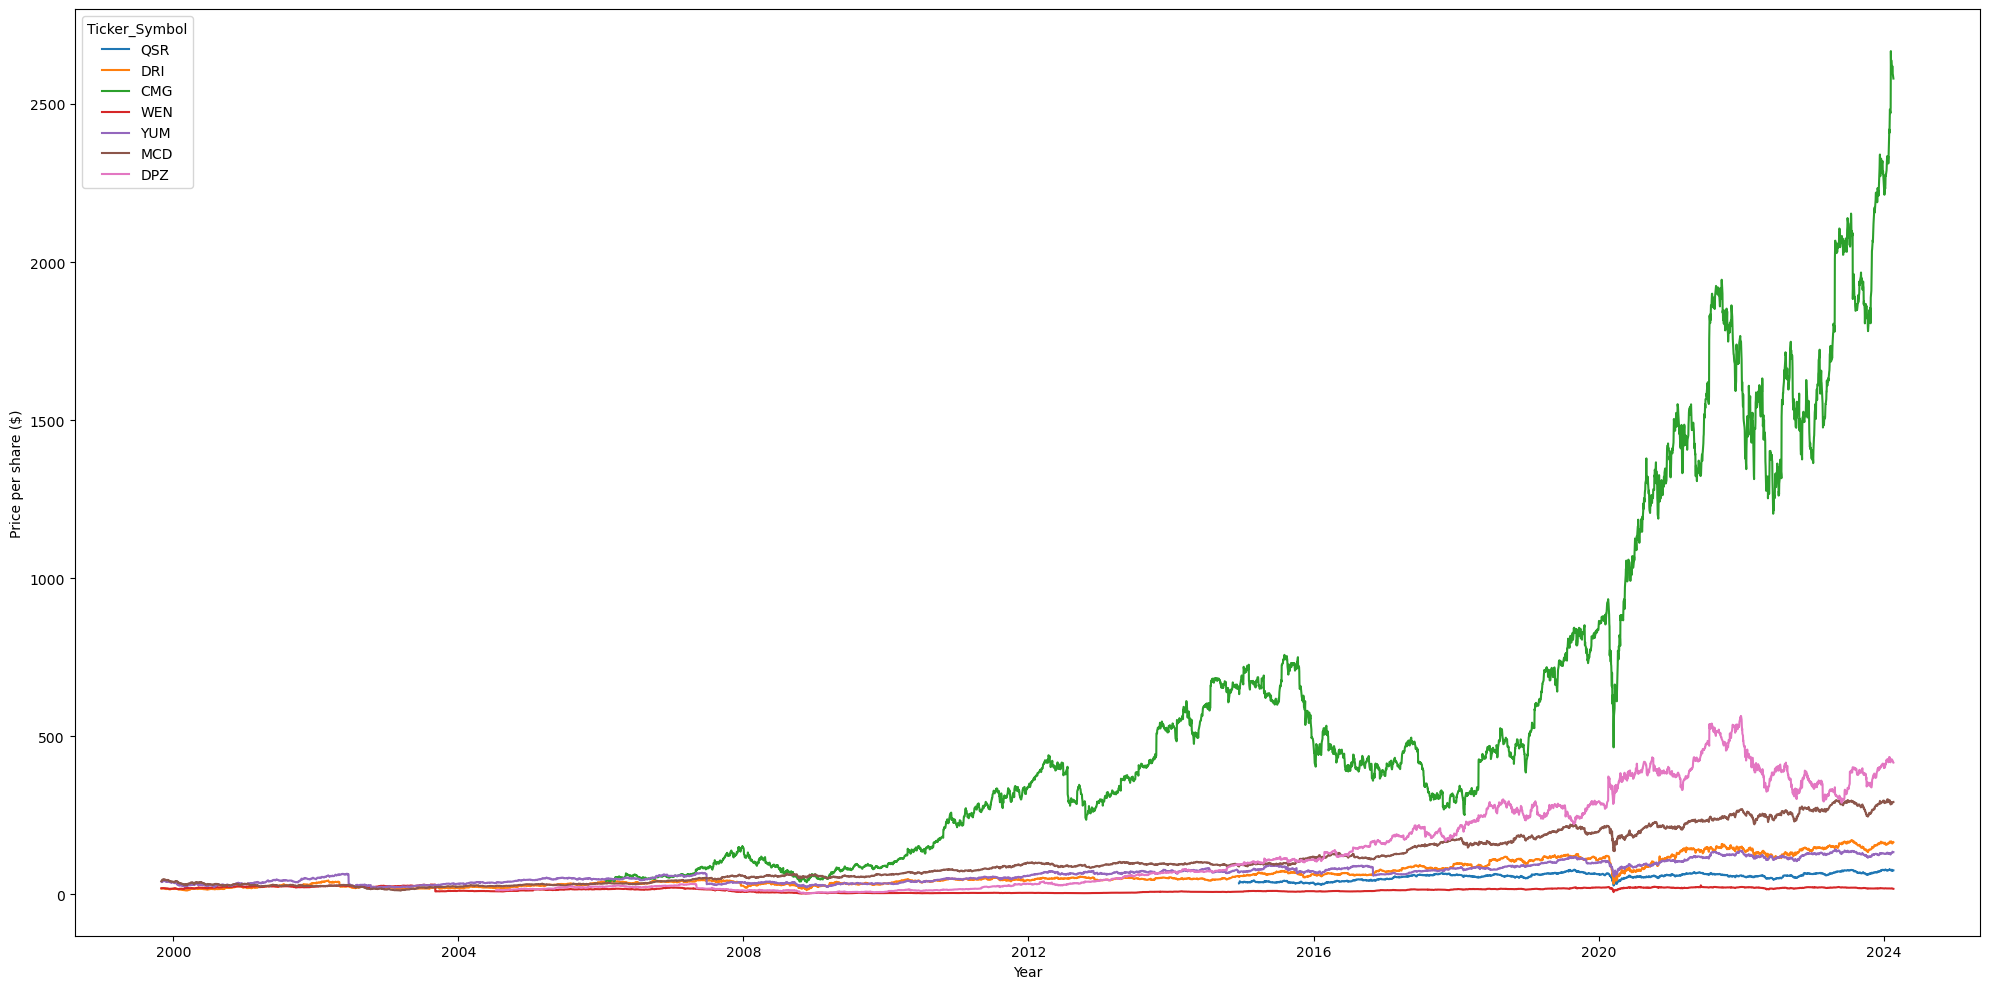

In [174]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

restaurants = ["QSR", "MCD", "YUM", "DPZ", "CMG", "DRI", "WEN"]
manufacturers = ["CAG", "HRL", "GIS", "PPC", "TSN"]

only_restaurants = stock_price_data[stock_price_data["Ticker_Symbol"].isin(restaurants)]
only_manufacturers = stock_price_data[stock_price_data["Ticker_Symbol"].isin(manufacturers)]

fig = sns.lineplot(data=only_restaurants, x="Date-Time", y="Close", hue="Ticker_Symbol")
plt.xlabel("Year")
plt.ylabel("Price per share ($)")
save_fig("Only_restaurants_linegraph")

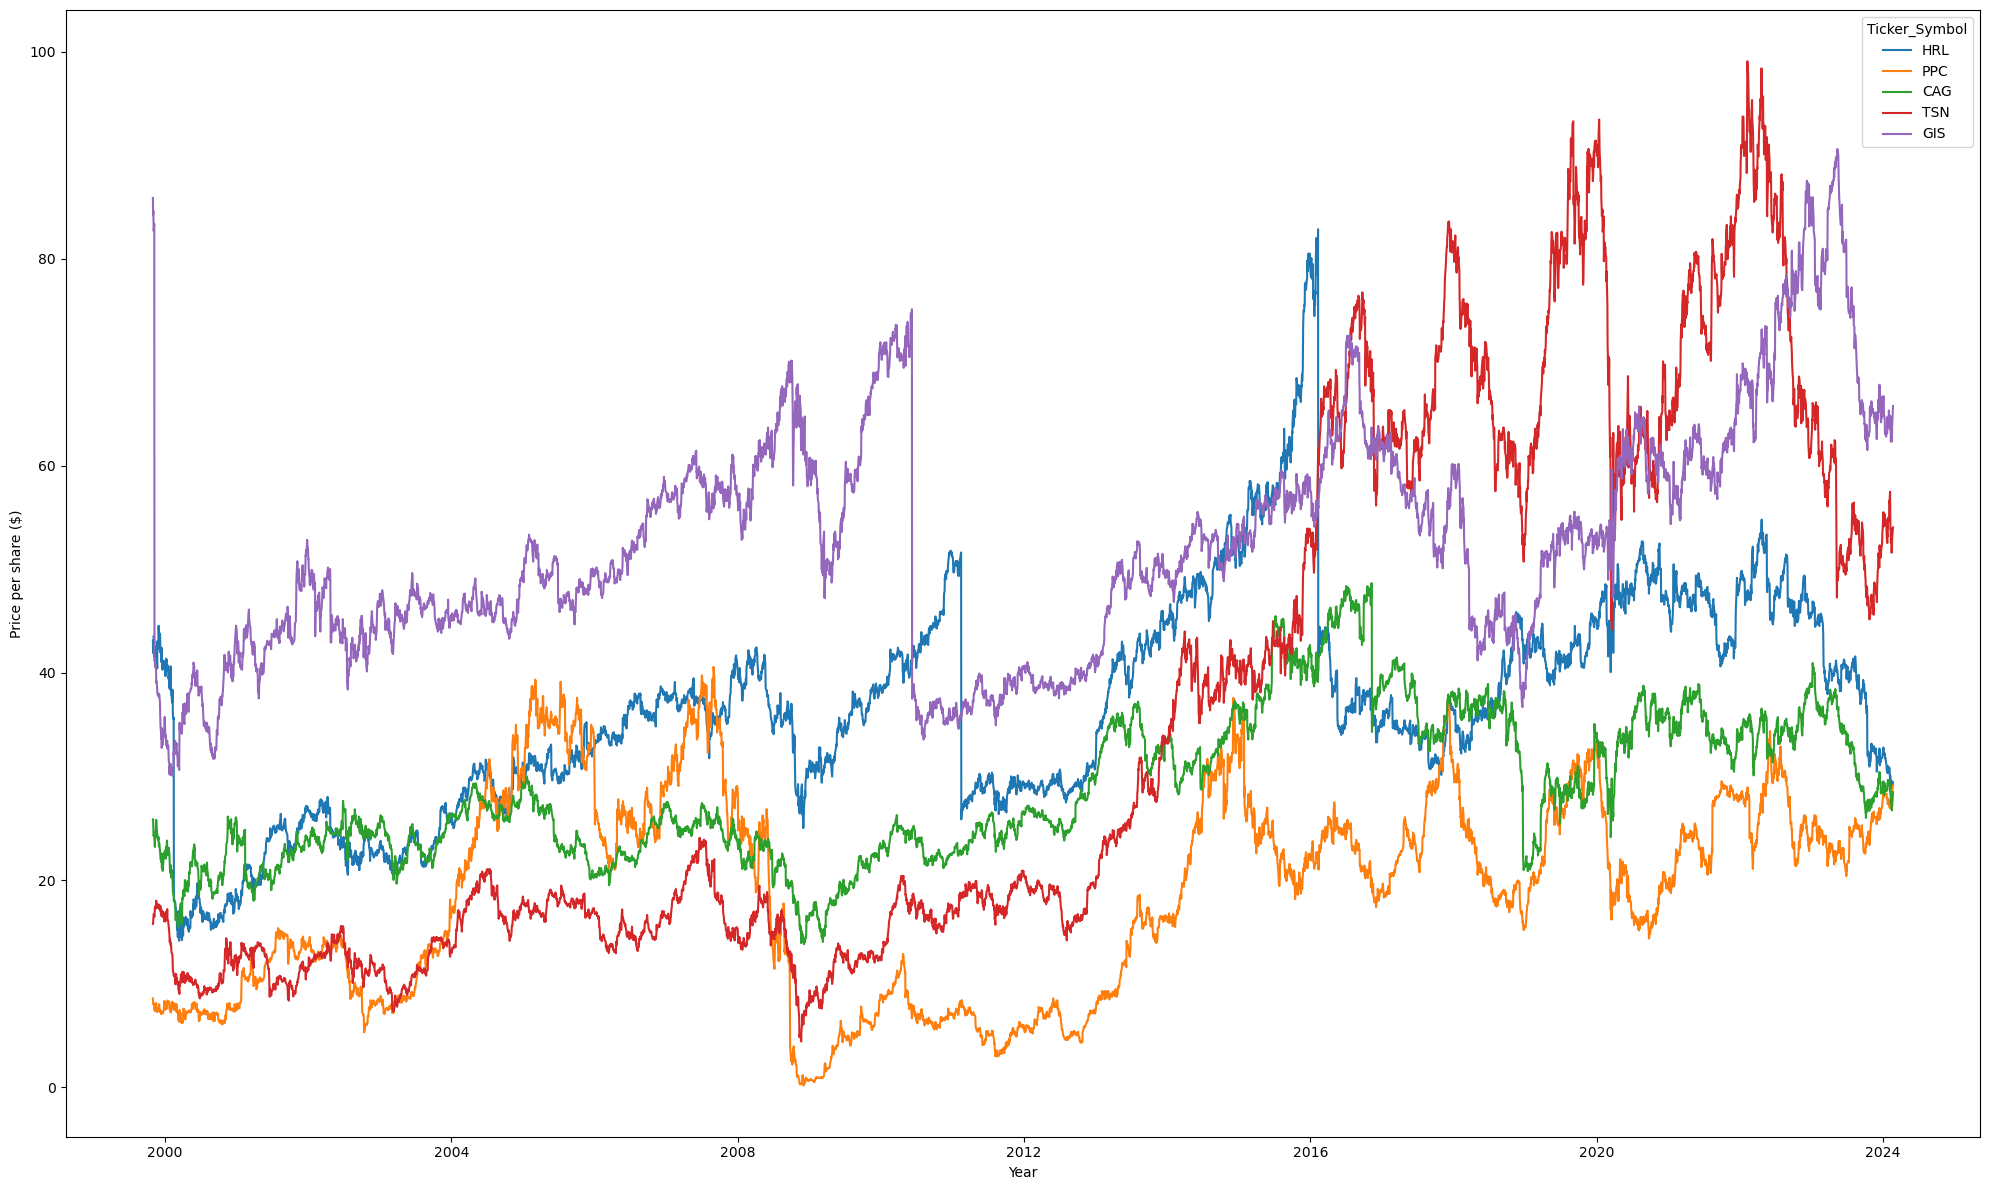

In [117]:
plt.figure(figsize=(20,12))
fig = sns.lineplot(data=only_manufacturers, x="Date-Time", y="Close", hue="Ticker_Symbol")
plt.xlabel("Year")
plt.ylabel("Price per share ($)")
save_fig("Only_manufacturers_linegraph")

In [6]:
nutrition_data["Question"].value_counts()

Question
Percent of adults aged 18 years and older who have obesity                                                                                                                                                                                               18117
Percent of adults aged 18 years and older who have an overweight classification                                                                                                                                                                          18117
Percent of adults who engage in no leisure-time physical activity                                                                                                                                                                                        18089
Percent of adults who engage in muscle-strengthening activities on 2 or more days a week                                                                                                                                          

In [7]:
nutrition_data["Age(years)"].value_counts()

Age(years)
25 - 34        3330
55 - 64        3330
18 - 24        3330
45 - 54        3330
35 - 44        3330
65 or older    3330
Name: count, dtype: int64

In [8]:
nutrition_data[nutrition_data["YearStart"] != nutrition_data["YearEnd"]]

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1


In [9]:
nutrition_data["YearStart"].value_counts()

YearStart
2019    18419
2017    18396
2015    15078
2013    15064
2011    14868
2021     7700
2016     4620
2018     4620
2022     4620
2020     4536
2014     4536
2009     4452
2007     4452
2012     4368
2005     3276
2003     2604
2001     1736
Name: count, dtype: int64

In [10]:
nutrition_data["StratificationCategory1"].value_counts()

StratificationCategory1
Race/Ethnicity    46688
Income            23310
Age (years)       19980
Education         13320
Gender            12388
Grade             11456
Total              6194
Name: count, dtype: int64

### Cluster by location and obesity rate

In [11]:
# split up the longitude and latitude of the geolocation column
X = nutrition_data.copy()
X["GeoLocation"] = X["GeoLocation"].str[1:-1]
split_columns = X["GeoLocation"].str.split(",", expand=True)
X[["Latitude", "Longitude"]] = split_columns.applymap(lambda x: float(x) if x else None)

In [12]:
unique_pairings = X[['Question', 'QuestionID']].drop_duplicates()
print(unique_pairings)

                                                Question QuestionID
0      Percent of students in grades 9-12 who achieve...       Q048
1      Percent of students in grades 9-12 who have ob...       Q038
3      Percent of students in grades 9-12 who partici...       Q049
4      Percent of students in grades 9-12 who have an...       Q039
11     Percent of students in grades 9-12 who drank r...       Q058
20     Percent of students in grades 9-12 who consume...       Q021
21     Percent of students in grades 9-12 who consume...       Q020
26     Percent of students in grades 9-12 watching 3 ...       Q059
40096  Percent of adults who engage in no leisure-tim...       Q047
40097  Percent of adults aged 18 years and older who ...       Q036
40099  Percent of adults aged 18 years and older who ...       Q037
40100  Percent of adults who achieve at least 300 min...       Q045
40101  Percent of adults who achieve at least 150 min...       Q044
40111  Percent of adults who achieve at least 15

In [13]:
from sklearn.cluster import KMeans

rows = ["Question", "QuestionID", "Latitude", "Longitude", "Data_Value"]
X_train = X[X[rows].notna().all(axis=1)]
# Only select the obesity rates
qsIDs = ["Q038", "Q039", "Q036", "Q037"]
X_train = X_train[X_train["QuestionID"].isin(qsIDs)]
X_train = X_train.loc[:, ["Data_Value", "Latitude", "Longitude"]]

X_train.head()

,Data_Value,Latitude,Longitude
1,13.3,34.865970,-111.763811
2,17.1,38.890371,-77.031961
4,16.7,39.290581,-76.609260
5,11.5,41.708280,-71.522470
6,12.2,47.066529,-109.424421


In [14]:
X_train.shape

(40078, 3)

In [15]:
kmeans = KMeans(n_clusters=10, n_init=10)
X_train["Cluster"] = kmeans.fit_predict(X_train)
X_train["Cluster"] = X_train["Cluster"].astype("category")

X_train.head()

C:\Users\wengl\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Data_Value,Latitude,Longitude,Cluster
1,13.3,34.865970,-111.763811,4
2,17.1,38.890371,-77.031961,3
4,16.7,39.290581,-76.609260,3
5,11.5,41.708280,-71.522470,3
6,12.2,47.066529,-109.424421,4


In [18]:
test = X_train[X_train["Longitude"] > 0]
test

,Data_Value,Latitude,Longitude,Cluster
29,20.9,13.444304,144.793731,2
580,11.0,13.444304,144.793731,2
892,24.5,13.444304,144.793731,2
1118,23.8,13.444304,144.793731,2
1324,20.0,13.444304,144.793731,2
...,...,...,...,...
129833,19.4,13.444304,144.793731,2
129837,33.8,13.444304,144.793731,2
129838,25.2,13.444304,144.793731,2
129844,25.4,13.444304,144.793731,2


C:\Users\wengl\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\wengl\AppData\Local\Temp\ipykernel_28584\2512521663.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


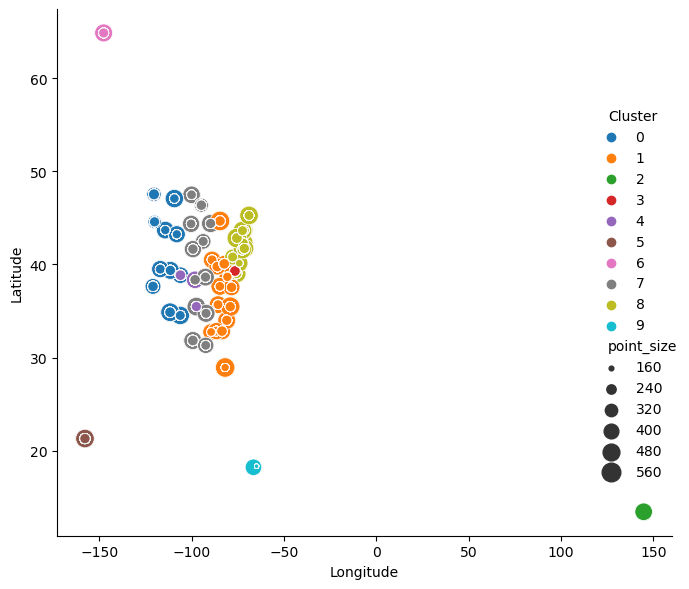

In [27]:
X_train["point_size"] = X_train.groupby(["Latitude", "Longitude"]).transform("size")

fig = sns.relplot(
    x="Longitude", y="Latitude", hue="Cluster", size="point_size", data=X_train, height=6, sizes=(10, 200)
);
save_fig("Location_Obesity_Cluster")

### Bar Chart for obesity rate based on location

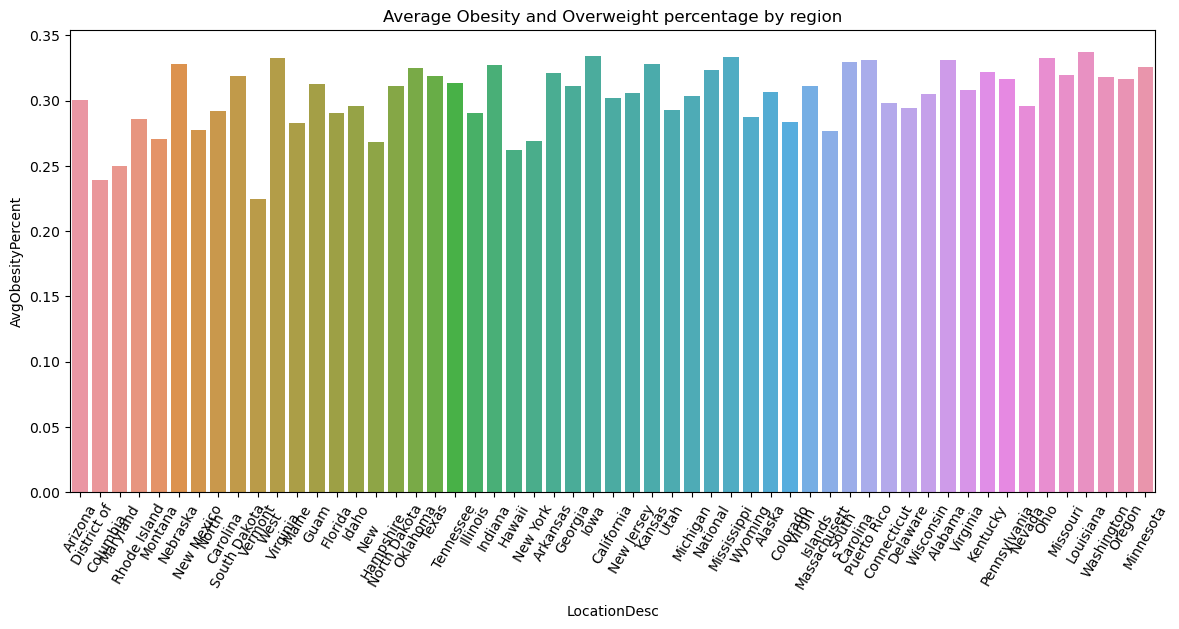

<Figure size 640x480 with 0 Axes>

In [42]:
import textwrap

X = nutrition_data.copy()
rows = ["Question", "QuestionID", "Data_Value", "Sample_Size", "LocationDesc"]
X = X[X[rows].notna().all(axis=1)]
# Only select the obesity rates
qsIDs = ["Q038", "Q039", "Q036", "Q037"]
X = X[X["QuestionID"].isin(qsIDs)]
X["NumObesity"] = X["Data_Value"] / 100 * X["Sample_Size"]
totalObesity = X.groupby("LocationDesc")["NumObesity"].transform(lambda g: g.sum())
totalSample = X.groupby("LocationDesc")["Sample_Size"].transform(lambda g: g.sum())
X["AvgObesityPercent"] = totalObesity / totalSample

plt.figure(figsize=(14,6))
plt.title("Average Obesity and Overweight percentage by region")
ax = sns.barplot(x=X["LocationDesc"], y=X["AvgObesityPercent"])
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=60)
plt.show()
save_fig("Obesity_Location_BarChart")

### Time Series Analysis of Stock Price 

C:\Users\wengl\AppData\Local\Temp\ipykernel_28584\3827514351.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsn_stock.sort_values("Date-Time", inplace=True)


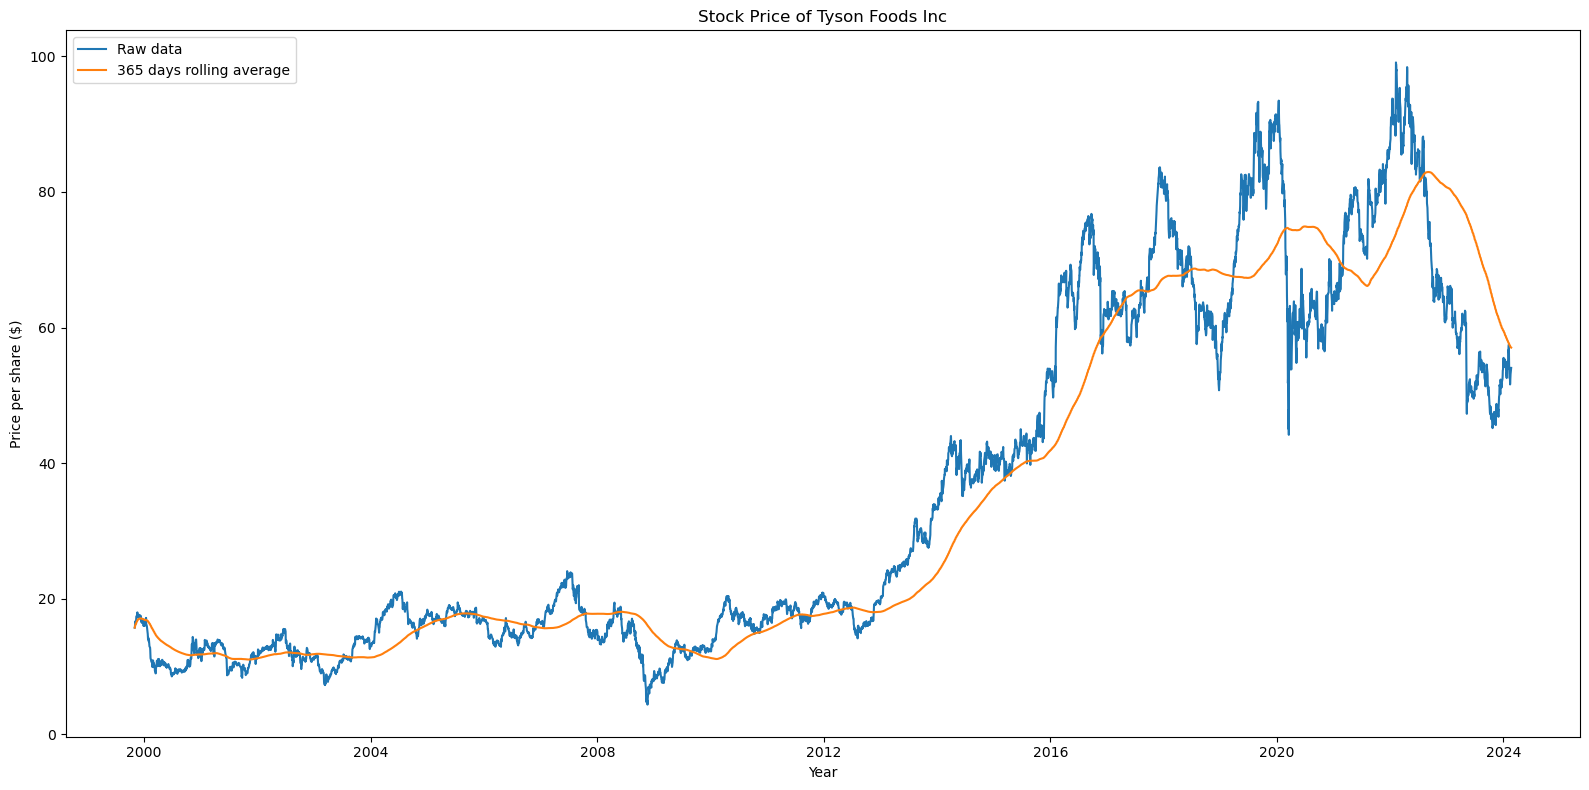

In [131]:
# X_stock = stock_price_data.copy()
tsn_stock = stock_price_data[stock_price_data["Ticker_Symbol"] == "TSN"]
tsn_stock.sort_values("Date-Time", inplace=True)
rolling_ave1 = tsn_stock["Close"].rolling(365, min_periods=1).mean()

plt.figure(figsize=(16, 8))
sns.lineplot(x=tsn_stock.index, y=tsn_stock["Close"], label="Raw data")
sns.lineplot(x=tsn_stock.index, y=rolling_ave1, label="365 days rolling average")
plt.title("Stock Price of Tyson Foods Inc")
plt.xlabel("Year")
plt.ylabel("Price per share ($)")
save_fig("TSN_linegraph")

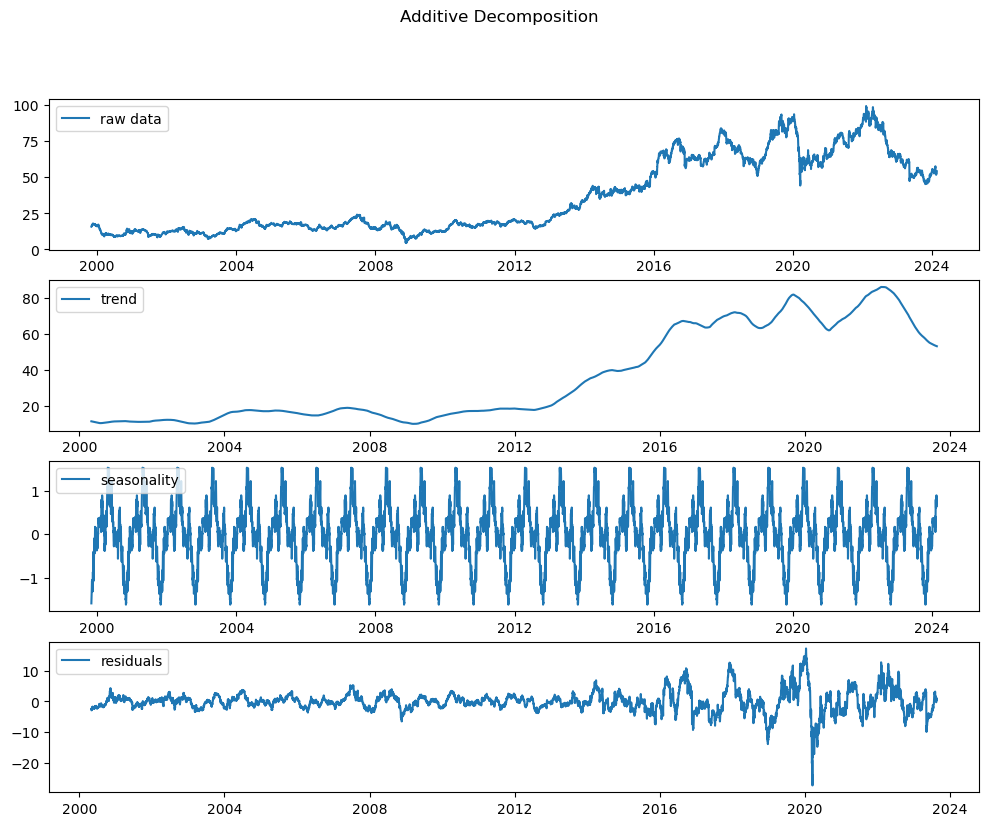

In [169]:
from statsmodels.tsa.seasonal import seasonal_decompose

X_tsn = tsn_stock.copy()
X_tsn.reset_index(inplace=True)
X_tsn = X_tsn[["Date-Time", "Close"]]
X_tsn.set_index("Date-Time", inplace=True)
X_tsn.index = pd.to_datetime(X_tsn.index)
date_range = pd.date_range(start=X_tsn.index.min(), end=X_tsn.index.max(), freq="D")
# Forward fill
X_tsn = X_tsn.reindex(date_range)
X_tsn = X_tsn.fillna(method="ffill")

decomp_a = seasonal_decompose(X_tsn, model='additive', period=365)
trend_a = decomp_a.trend
seasonal_a = decomp_a.seasonal
resid_a = decomp_a.resid

plt.figure(figsize=(12,9))
plt.suptitle('Additive Decomposition')

plt.subplot(411)
plt.plot(X_tsn.index, X_tsn["Close"], label='raw data')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(X_tsn.index, trend_a, label='trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(X_tsn.index, seasonal_a, label='seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(X_tsn.index, resid_a, label='residuals')
plt.legend(loc='upper left')

### Obesity vs time 

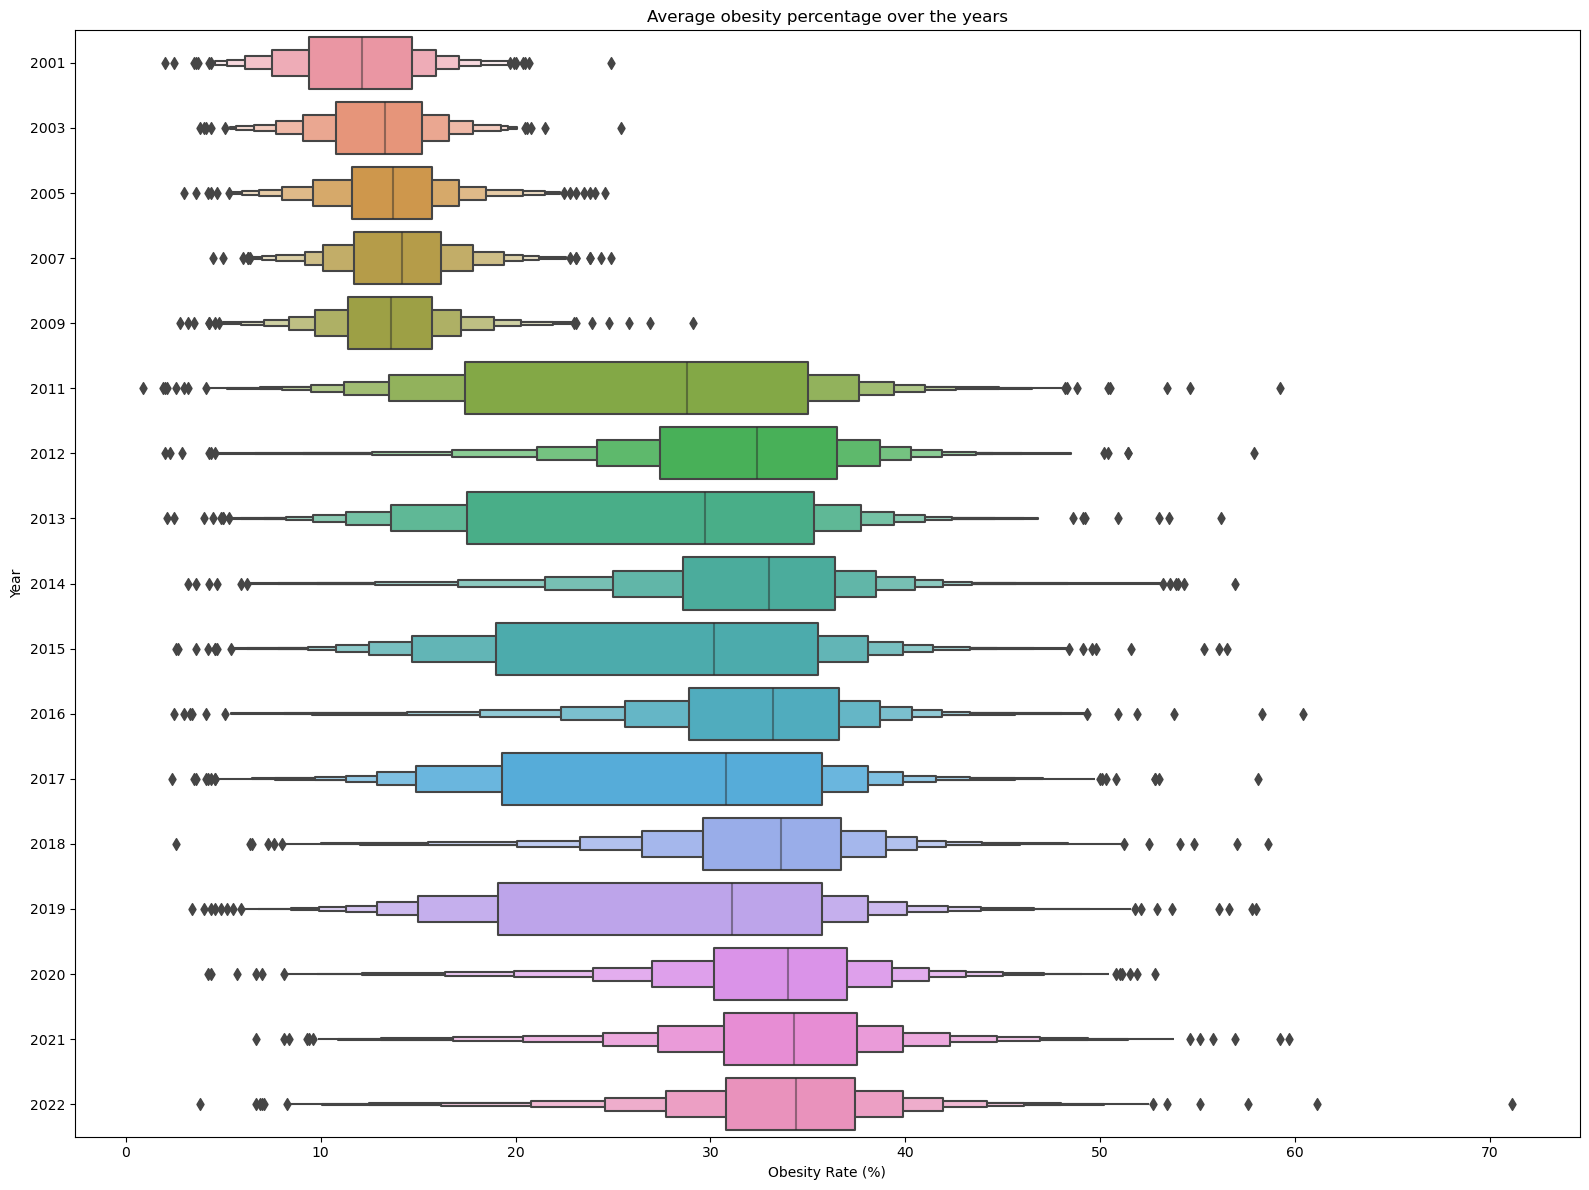

In [63]:
X = nutrition_data.copy()
rows = ["QuestionID", "Data_Value", "YearStart"]
X = X[X[rows].notna().all(axis=1)]
# Only select the obesity rates
qsIDs = ["Q038", "Q039", "Q036", "Q037"]
X = X[X["QuestionID"].isin(qsIDs)]
X["YearStart"] = X["YearStart"].astype("category")

plt.figure(figsize=(16, 12))
plt.title("Average obesity percentage over the years")
sns.boxenplot(data=X, x="Data_Value", y="YearStart")
plt.xlabel("Obesity Rate (%)")
plt.ylabel("Year")
save_fig("obesity_time_boxenplot")

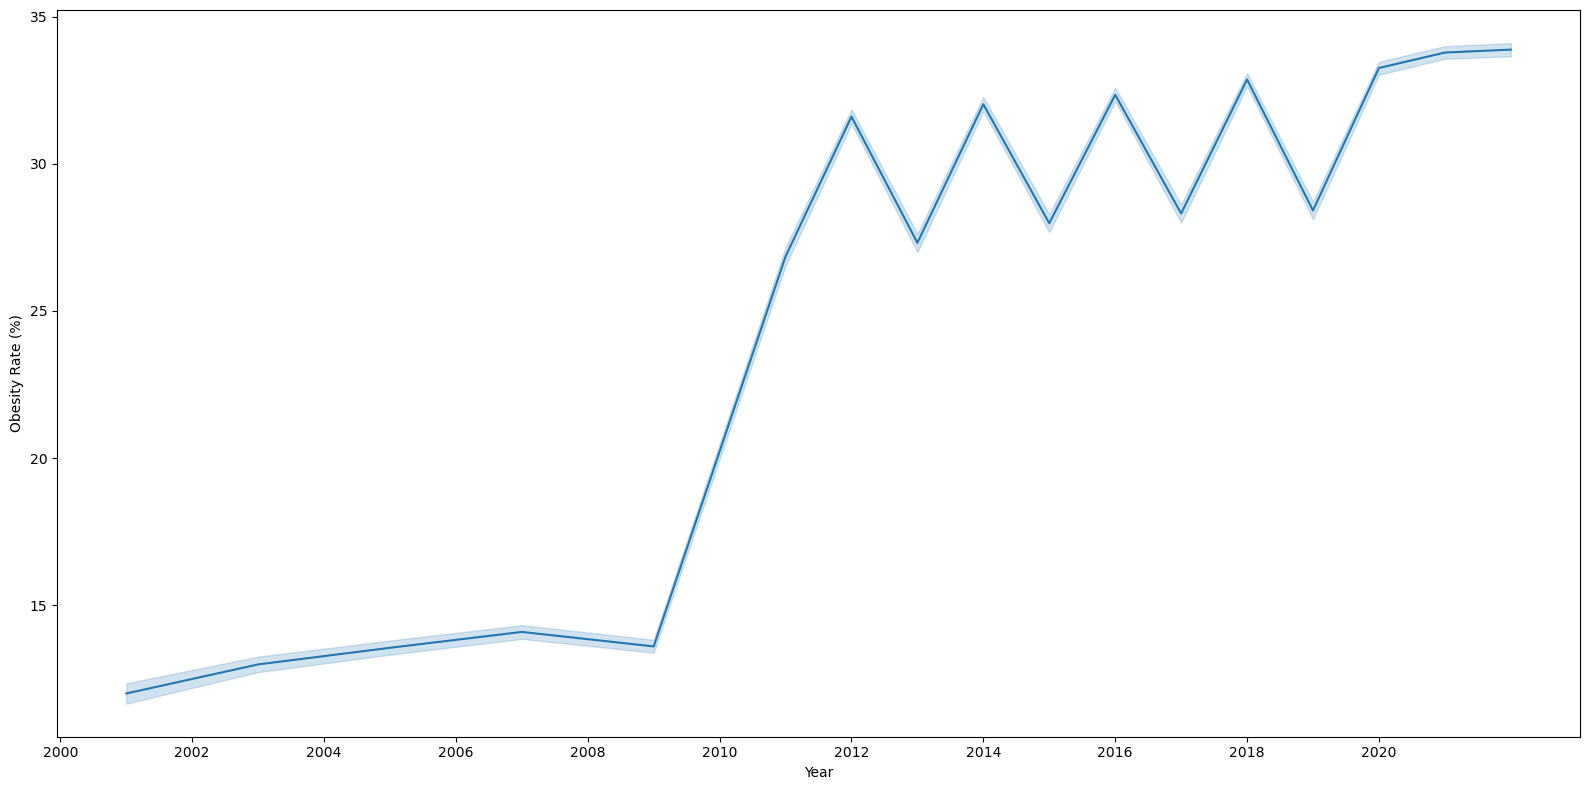

In [72]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=X, x="YearStart", y="Data_Value")
plt.xticks(range(2000, 2021, 2))
plt.xlabel("Year")
plt.ylabel("Obesity Rate (%)")
save_fig("obesity_time_linegraph")

### Obesity by age and gender

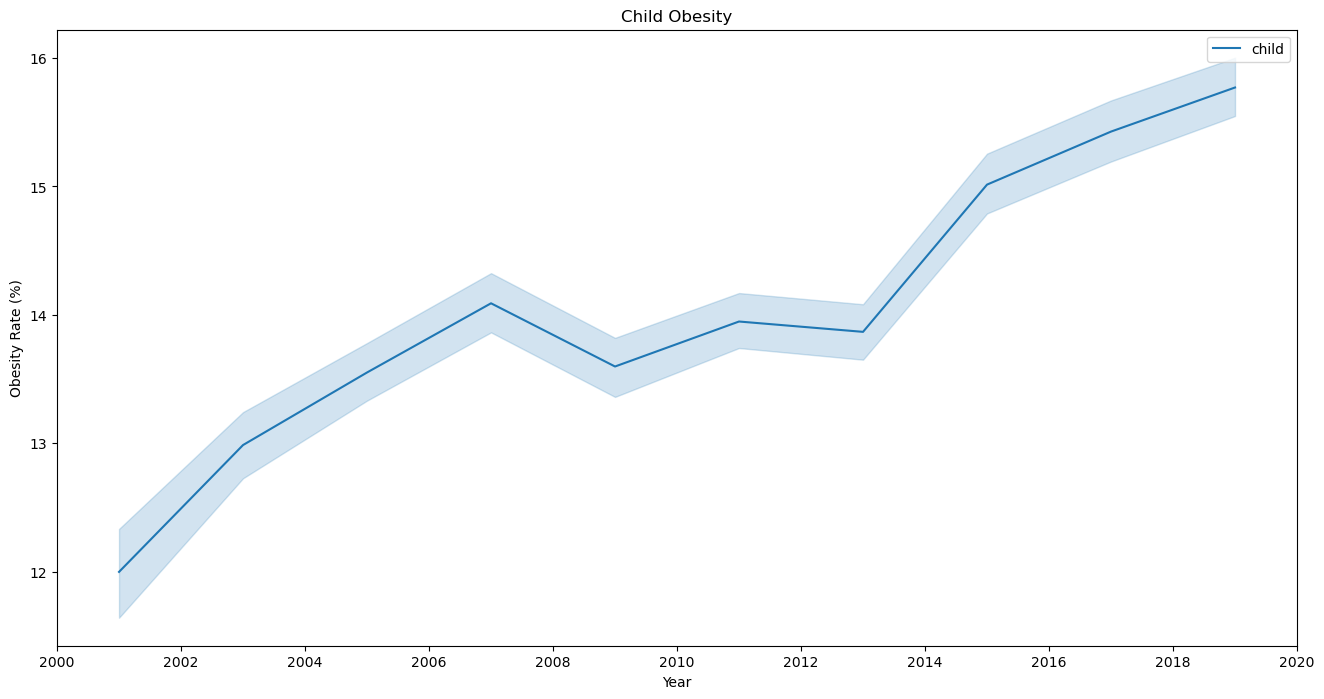

In [95]:
obesity_child = X[X["Question"].str.contains("student")]
obesity_adult = X[X["Question"].str.contains("adult") & (X["Age(years)"] != "65 or older")]
obesity_elder = X[X["Question"].str.contains("adult") & (X["Age(years)"] == "65 or older")]

plt.figure(figsize=(16, 8))
plt.title("Child Obesity")
sns.lineplot(data=obesity_child, x="YearStart", y="Data_Value", label="child")
plt.xticks(range(2000, 2021, 2))
plt.xlabel("Year")
plt.ylabel("Obesity Rate (%)")
plt.show()
# save_fig("child_obesity_linegraph")

Text(0, 0.5, 'Obesity Rate (%)')

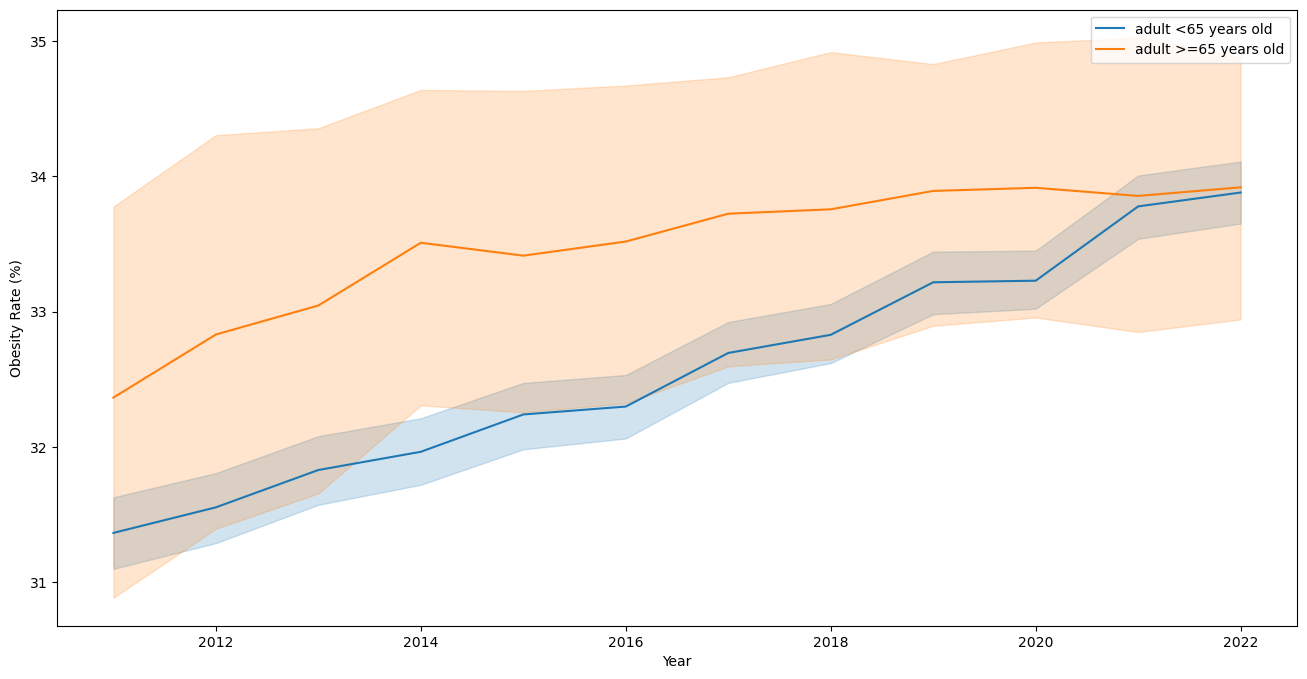

In [99]:
plt.figure(figsize=(16, 8))
sns.lineplot(data=obesity_adult, x="YearStart", y="Data_Value", label="adult <65 years old")
sns.lineplot(data=obesity_elder, x="YearStart", y="Data_Value", label="adult >=65 years old")
plt.xlabel("Year")
plt.ylabel("Obesity Rate (%)")

Text(0, 0.5, 'Obesity Rate (%)')

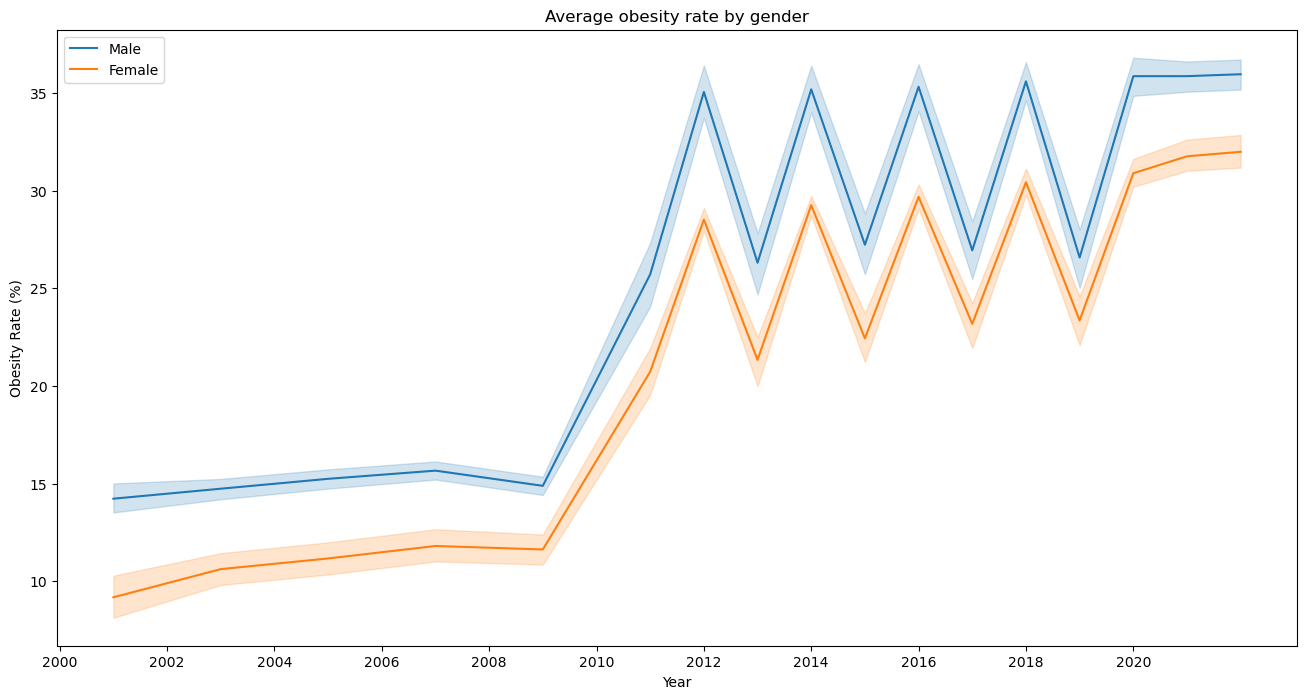

In [101]:
obesity_male = X[X["Gender"] == "Male"]
obesity_female = X[X["Gender"] == "Female"]

plt.figure(figsize=(16, 8))
plt.title("Average obesity rate by gender")
sns.lineplot(data=obesity_male, x="YearStart", y="Data_Value", label="Male")
sns.lineplot(data=obesity_female, x="YearStart", y="Data_Value", label="Female")
plt.xticks(range(2000, 2021, 2))
plt.xlabel("Year")
plt.ylabel("Obesity Rate (%)")

In [170]:
meat_storage_filepath = Path() / "Datathon Data/Meat_Stats_Cold_Storage.csv"
meat_prod_filepath = Path() / "Datathon Data/Meat_Stats_Meat_Production.csv"
meat_slaughter_filepath = Path() / "Datathon Data/Meat_Stats_Slaughter_Weights.csv"
economy_filepath = Path() / "Datathon Data/acs_5yr_est_selected_economic_characteristics_2010-2022.csv"

meat_storage_data = pd.read_csv(meat_storage_filepath, parse_dates=True)
meat_prod_data = pd.read_csv(meat_prod_filepath, parse_dates=True)
meat_slaughter_data = pd.read_csv(meat_slaughter_filepath, parse_dates=True)
economy_data = pd.read_csv(economy_filepath)

### Compare employment rates of states with diff lvl of plant-based diet habits 

In [172]:
X = nutrition_data.copy()
rows = ["QuestionID", "Data_Value", "Sample_Size", "LocationDesc"]
X = X[X[rows].notna().all(axis=1)]
# Only select the fruit and veg questions
qsIDs = ["Q018", "Q019", "Q020", "Q021"]
X = X[X["QuestionID"].isin(qsIDs)]
X["NumNoVeg"] = X["Data_Value"] / 100 * X["Sample_Size"]
totalNoVeg = X.groupby("LocationDesc")["NumNoVeg"].transform(lambda g: g.sum())
totalSample = X.groupby("LocationDesc")["Sample_Size"].transform(lambda g: g.sum())
X["AvgNoVegPercent"] = totalNoVeg / totalSample

X.sort_values("AvgNoVegPercent", inplace=True)
X[["AvgNoVegPercent", "LocationDesc"]].head()

,AvgNoVegPercent,LocationDesc
126598,0.25608,Oregon
91010,0.25608,Oregon
54708,0.25608,Oregon
74236,0.25608,Oregon
54695,0.25608,Oregon


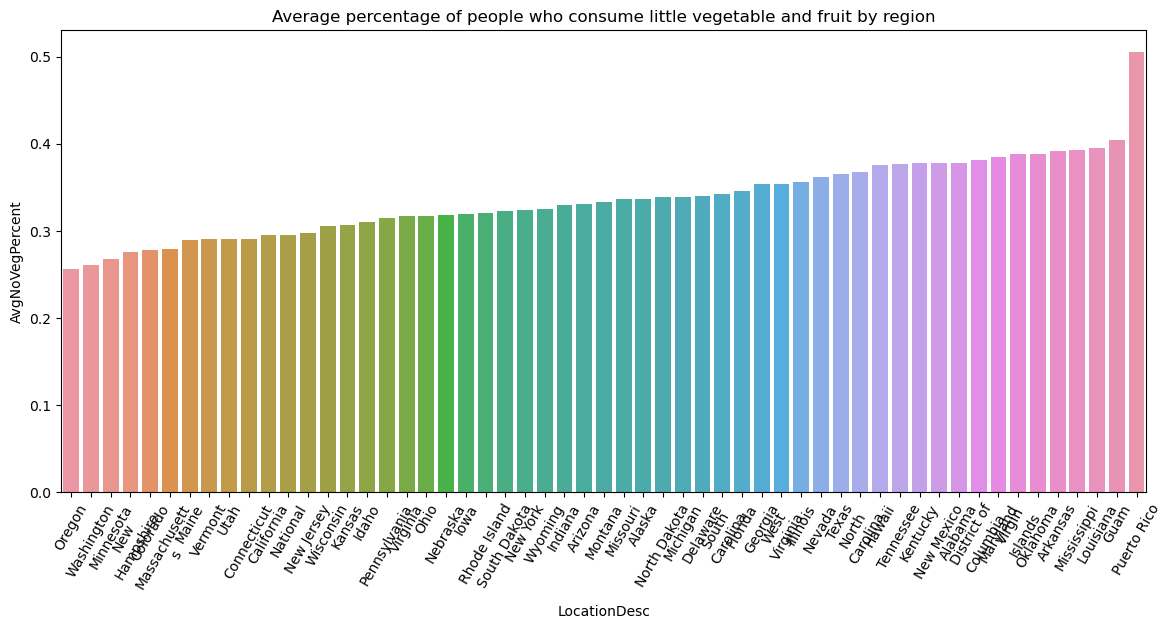

<Figure size 640x480 with 0 Axes>

In [173]:
plt.figure(figsize=(14,6))
plt.title("Average percentage of people who consume little vegetable and fruit by region")
ax = sns.barplot(x=X["LocationDesc"], y=X["AvgNoVegPercent"])
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels, rotation=60)
plt.show()
save_fig("PlantBasedDiet_Location_BarChart")

Hence we see that the 3 regions that have the highest percentage of plant based diet adoption is:
Oregon, Washington, Minnesota
Conversely, the 3 regions that eat the least plant based diet is:
Louisiana, Guam, and Puerto Rico